In [11]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
sv1849 = [283, 157, 192, 249, 259, 226, 352, 97, 111, 8, 235, 92]
lsv1849 = [256, 267, 312, 257, 318, 446, 143, 193, 243, 215, 544, 187, 153, 81, 113, 176]
sv1854 = [371, 161, 148, 362, 244, 237, 282, 59, 171, 9, 240, 174]
lsv1854 = [113, 174, 270, 93, 210, 388, 92, 58, 117, 49, 193, 303, 142, 48, 165, 132]

sv_death = sv1849 + sv1854
lsv_death = lsv1849 + lsv1854


In [6]:
sv_area = ["sv_" + str(i) for i in range(1, len(sv1849)+1)] + ["sv_" + str(i) for i in range(1, len(sv1854)+1)]
lsv_area = ["lsv_" + str(i) for i in range(1, len(lsv1849)+1)] + ["lsv_" + str(i) for i in range(1, len(lsv1854)+1)]


In [8]:
sv_area = ["sv_" + str(i) for i in range(1, len(sv1849) + 1)] + ["sv_" + str(i) for i in range(1, len(sv1854) + 1)]
lsv_area = ["lsv_" + str(i) for i in range(1, len(lsv1849) + 1)] + ["lsv_" + str(i) for i in range(1, len(lsv1854) + 1)]
sv_year = ["1849"] * len(sv1849) + ["1854"] * len(sv1854)
lsv_year = ["1849"] * len(lsv1849) + ["1854"] * len(lsv1854)

sv = pd.DataFrame({
        "area": sv_area,
        "year": sv_year,
        "death": sv_death,
        "LSV": ["0"] * len(sv_area),
        "company": ["Southwark and Vauxhall"] * len(sv_area)
    })

lsv = pd.DataFrame({
        "area": lsv_area,
        "year": lsv_year,
        "death": lsv_death,
        "LSV": ["1"] * len(lsv_area),
        "company": ["Lambeth & Southwark and Vauxhall"] * len(lsv_area)
    })


In [12]:
JS_df = pd.concat([sv, lsv])
JS_df["LSV"] = np.where(JS_df["company"] == "Lambeth & Southwark and Vauxhall", 1, 0)


In [14]:
JS_sum = JS_df.groupby(["company", "LSV", "year"]).agg({"death": "sum"}).reset_index()


In [15]:
JS_grp_summary = JS_sum.copy()
JS_grp_summary["year"] = JS_grp_summary["year"].apply(lambda x: f"year_{x}")
JS_grp_summary = JS_grp_summary.pivot(index=["company", "LSV"], columns="year", values="death").reset_index()
JS_grp_summary["gap"] = JS_grp_summary["year_1854"] - JS_grp_summary["year_1849"]
JS_grp_summary["gap_rate"] = JS_grp_summary["year_1854"] / JS_grp_summary["year_1849"] - 1


In [16]:
JS_grp_summary

year,company,LSV,year_1849,year_1854,gap,gap_rate
0,Lambeth & Southwark and Vauxhall,1,3904,2547,-1357,-0.347592
1,Southwark and Vauxhall,0,2261,2458,197,0.087130


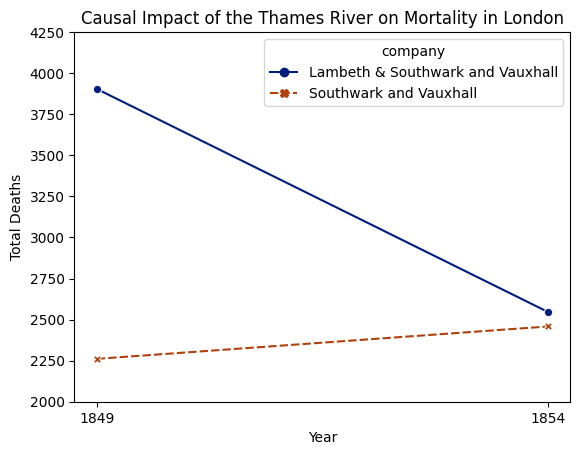

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

did_plot = sns.lineplot(x="year", y="death", hue="company", data=JS_sum,
                        markers=True, style="company", palette="dark")

did_plot.set(ylim=(2000, 4250))
did_plot.set_title("Causal Impact of the Thames River on Mortality in London")
did_plot.set_xlabel("Year")
did_plot.set_ylabel("Total Deaths")

plt.show()


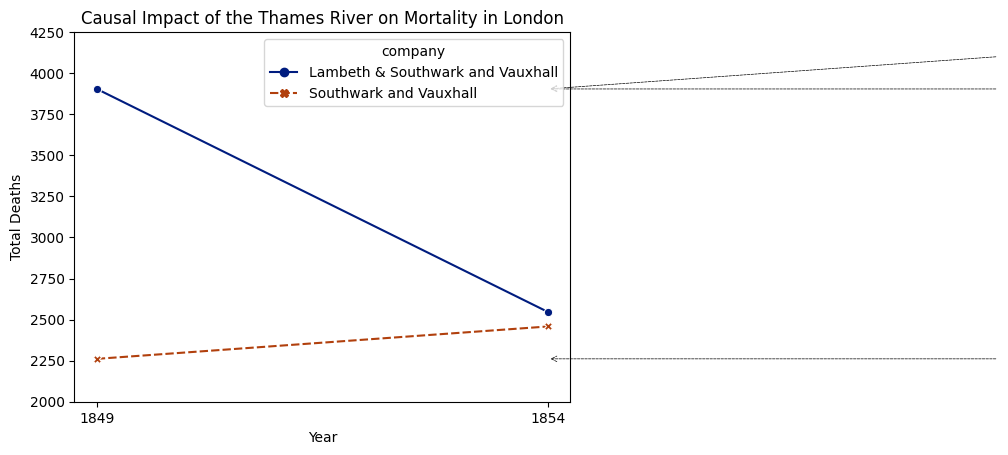

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
did_plot = sns.lineplot(x="year", y="death", hue="company", data=JS_sum,
                        markers=True, style="company", palette="dark")

# Set the plot limits and labels
did_plot.set(ylim=(2000, 4250))
did_plot.set_title("Causal Impact of the Thames River on Mortality in London")
did_plot.set_xlabel("Year")
did_plot.set_ylabel("Total Deaths")

# Add annotations to the plot
did_plot.annotate("(1)", xy=(2.2, 2400))
did_plot.annotate("(2)", xy=(2.2, 3904 + 197*0.6))
did_plot.annotate("(3)", xy=(2.2, 3300))
did_plot.annotate("", xy=(1, 3904), xytext=(2, 3904 + 197),
                  arrowprops=dict(arrowstyle="->", ls="--", lw=0.5))
did_plot.annotate("", xy=(1, 2261), xytext=(2, 2261),
                  arrowprops=dict(arrowstyle="->", ls="--", lw=0.5))
did_plot.annotate("", xy=(1, 3904), xytext=(2, 3904),
                  arrowprops=dict(arrowstyle="->", ls="--", lw=0.5))
did_plot.annotate("", xy=(2.07, 2261), xytext=(2.07, 2458),
                  arrowprops=dict(arrowstyle="<->", lw=0.5))
did_plot.annotate("", xy=(2.07, 3904), xytext=(2.07, 3904 + 197),
                  arrowprops=dict(arrowstyle="<->", lw=0.5))
did_plot.annotate("", xy=(2.07, 3904), xytext=(2.07, 2547),
                  arrowprops=dict(arrowstyle="<->", lw=0.5))

# Show the plot
plt.show()
